In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
!conda install -c conda-forge folium=0.5.0 --yes
import folium

print('Folium installed and imported!')

Solving environment: ...working... done

# All requested packages already installed.

Folium installed and imported!


In [231]:
df = pd.read_csv('C:\\Users\\Shubham raj\\Desktop\Datasets\Fifa 19 dataset/data.csv')
df.rename(columns={'Unnamed: 0':"Index"},inplace=True)
df

,Index,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,...,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,€110.5M,€565K,2202,Left,5.0,4.0,4.0,Medium/ Medium,Messi,Yes,RF,10.0,"Jul 1, 2004",NaN,2021,5'7,159lbs,88+2,88+2,88+2,92+2,93+2,93+2,93+2,...,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,€77M,€405K,2228,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,Yes,ST,7.0,"Jul 10, 2018",NaN,2022,6'2,183lbs,91+3,91+3,91+3,89+3,90+3,90+3,90+3,...,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,€118.5M,€290K,2143,Right,5.0,5.0,5.0,High/ Medium,Neymar,Yes,LW,10.0,"Aug 3, 2017",NaN,2022,5'9,150lbs,84+3,84+3,84+3,89+3,89+3,89+3,89+3,...,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,€72M,€260K,1471,Right,4.0,3.0,1.0,Medium/ Medium,Lean,Yes,GK,1.0,"Jul 1, 2011",NaN,2020,6'4,168lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,€102M,€355K,2281,Right,4.0,5.0,4.0,High/ High,Normal,Yes,RCM,7.0,"Aug 30, 2015",NaN,2023,5'11,154lbs,82+3,82+3,82+3,87+3,87+3,87+3,87+3,...,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,18202,238813,J. Lundstram,19,https://cdn.sofifa.org/players/4/19/238813.png,England,https://cdn.sofifa.org/flags/14.png,47,65,Crewe Alexandra,https://cdn.sofifa.org/teams/2/light/121.png,€60K,€1K,1307,Right,1.0,2.0,2.0,Medium/ Medium,Lean,No,CM,22.0,"May 3, 2017",NaN,2019,5'9,134lbs,42+2,42+2,42+2,44+2,44+2,44+2,44+2,...,34.0,38.0,40.0,49.0,25.0,42.0,30.0,34.0,45.0,43.0,54.0,57.0,60.0,49.0,76.0,43.0,55.0,40.0,47.0,38.0,46.0,46.0,39.0,52.0,43.0,45.0,40.0,48.0,47.0,10.0,13.0,7.0,8.0,9.0,€143K
18203,18203,243165,N. Christoffersson,19,https://cdn.sofifa.org

# Football playing countries

In [4]:
df['Nationality'].sort_values().unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua & Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Barbados', 'Belarus', 'Belgium',
       'Belize', 'Benin', 'Bermuda', 'Bolivia', 'Bosnia Herzegovina',
       'Botswana', 'Brazil', 'Bulgaria', 'Burkina Faso', 'Burundi',
       'Cameroon', 'Canada', 'Cape Verde', 'Central African Rep.', 'Chad',
       'Chile', 'China PR', 'Colombia', 'Comoros', 'Congo', 'Costa Rica',
       'Croatia', 'Cuba', 'Curacao', 'Cyprus', 'Czech Republic',
       'DR Congo', 'Denmark', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'England', 'Equatorial Guinea', 'Eritrea',
       'Estonia', 'Ethiopia', 'FYR Macedonia', 'Faroe Islands', 'Fiji',
       'Finland', 'France', 'Gabon', 'Gambia', 'Georgia', 'Germany',
       'Ghana', 'Greece', 'Grenada', 'Guam', 'Guatemala', 'Guinea',
       'Guinea Bissau', 'Guyana', 'Haiti', 'Honduras', 'Hong Kong',
       'Hungary', 'Iceland', 'India', 

# Number of players playing for different countries

In [5]:
#df['Nationality'].value_counts() can be used to get the number of countries easily, but trying out new things is fun ;)

def CountFrequency(my_list):  
    freq = {}  #empty dictionary
    for item in my_list: 
        if (item in freq): 
            freq[item] += 1
        else: 
            freq[item] = 1
  
    len_dict = len(freq)
    d = pd.DataFrame(list(freq.items()),index=pd.RangeIndex(0,len_dict,1),columns=['Nationality','Total'])
    return(d)

my_list = list(df['Nationality'])
CountFrequency(my_list)

,Nationality,Total
0,Argentina,937
1,Portugal,322
2,Brazil,827
3,Spain,1072
4,Belgium,260
...,...,...
159,Malta,1
160,Belize,1
161,South Sudan,1
162,Indonesia,1


In [6]:
world_coords = pd.read_csv('C:\\Users\\Shubham raj\\Desktop\Datasets\Fifa 19 dataset/world_coordinates.csv')
world_coords.rename(columns={'Country' : 'Nationality'},inplace=True)
world_coords.head()

,Code,Nationality,latitude,longitude
0,AD,Andorra,42.546245,1.601554
1,AE,United Arab Emirates,23.424076,53.847818
2,AF,Afghanistan,33.939110,67.709953
3,AG,Antigua and Barbuda,17.060816,-61.796428
4,AI,Anguilla,18.220554,-63.068615


In [7]:
nations = list(df['Nationality'])
country_tot_df = CountFrequency(nations)
foot_data = pd.merge(country_tot_df,world_coords,on='Nationality')
foot_data.head()

,Nationality,Total,Code,latitude,longitude
0,Argentina,937,AR,-38.416097,-63.616672
1,Portugal,322,PT,39.399872,-8.224454
2,Brazil,827,BR,-14.235004,-51.925280
3,Spain,1072,ES,40.463667,-3.749220
4,Belgium,260,BE,50.503887,4.469936


In [8]:
world_map1 = folium.Map(location=[10, -20], zoom_start=2.3,tiles='Stamen Toner')

for lat, lon, value, name in zip(foot_data['latitude'], foot_data['longitude'], foot_data['Total'], foot_data['Nationality']):
    folium.features.CircleMarker([lat, lon], radius=10, popup = ('<strong>Nation</strong>: ' + str(name) + '<br>'
                                '<strong>Total</strong>: ' + str(value) + '<br>'), color='red',fill=True
                                 ,fill_color='red',fill_opacity=0.7).add_to(world_map1)
world_map1

# Number of players playing for different clubs

In [9]:
#df['Club'].value_counts() can be used to get the number 0f countries easily, but trying out new things is fun ;)
def CountFreq(my_list):  
    freq = {}  #empty dictionary
    for item in my_list: 
        if (item in freq): 
            freq[item] += 1
        else: 
            freq[item] = 1
  
    #for key, value in freq.items(): 
        #print ("% s : % s"%(key, value))
    len_dict = len(freq)
    d = pd.DataFrame(list(freq.items()),index=pd.RangeIndex(0,len_dict,1),columns=['Club','Total'])
    return(d)
    
        
my_list = list(df['Club'])
CountFreq(my_list)

,Club,Total
0,FC Barcelona,33
1,Juventus,25
2,Paris Saint-Germain,30
3,Manchester United,33
4,Manchester City,33
...,...,...
647,Newport County,26
648,Sligo Rovers,19
649,Derry City,18
650,Limerick FC,19


# Indian Players

In [10]:
df_India = df[df['Nationality'] == 'India'][['Name','Age','Overall','Potential','Position']]

df_India

,Name,Age,Overall,Potential,Position
8605,S. Chhetri,33,67,67,LS
10011,S. Jhingan,24,65,71,RCB
12598,J. Lalpekhlua,27,63,64,RS
12811,G. Singh Sandhu,26,63,68,GK
13508,A. Edathodika,31,62,62,LCB
14054,P. Halder,25,61,67,RCM
14199,P. Kotal,24,61,66,RB
14218,L. Ralte,25,61,62,LW
14705,N. Das,24,60,65,LB
14786,U. Singh,22,60,67,RM


In [11]:
df_India.describe()

,Age,Overall,Potential
count,30.000000,30.000000,30.000000
mean,24.933333,58.666667,63.600000
std,3.741043,3.294021,4.140631
min,19.000000,53.000000,56.000000
25%,22.000000,56.250000,61.250000
50%,24.500000,58.000000,64.000000
75%,26.750000,60.750000,66.750000
max,33.000000,67.000000,71.000000


# Countries with the most top rated players, based on average overall 

In [12]:
def SumOverall(list_nation,list_overall):
    freq = {}
    for i,item in enumerate(list_nation):
        if (item in freq):
            freq[item] += list_overall[i]
        else:
            freq[item] = list_overall[i]
    
    #for key, value in freq.items(): 
        #print ("% s : % s"%(key, value))
    len_dict = len(freq)
    d = pd.DataFrame(list(freq.items()),index=pd.RangeIndex(0,len_dict,1),columns=['Nationality','Overall'])
    return(d)
    

list_nation = list(df['Nationality'])
list_overall = list(df['Overall'])

### We'll ignore all the countries with less than 50 players

In [13]:
list_nation = list(df['Nationality'])
list_overall = list(df['Overall'])
country_total_df = CountFrequency(list_nation)
Overall_total_df = SumOverall(list_nation,list_overall)
df_merged = pd.merge(country_total_df, Overall_total_df,how='inner',left_index=True,right_index=True)
df_merged.drop(['Nationality_y'],axis=1,inplace=True)
df_merged.rename(columns={'Nationality_x':'Nationality'},inplace=True)
df_merged = df_merged[df_merged.Total >= 50]
df_merged['Net Overall'] = df_merged['Overall']/df_merged['Total']
df_merged.sort_values('Net Overall',ascending=False)
df_merged.style.background_gradient(cmap='Purples')

,Nationality,Total,Overall,Net Overall
0,Argentina,937,64252,68.572
1,Portugal,322,22973,71.3447
2,Brazil,827,58925,71.2515
3,Spain,1072,74717,69.6987
4,Belgium,260,17891,68.8115
5,Croatia,126,8765,69.5635
6,Uruguay,149,10494,70.4295
7,Slovenia,55,3824,69.5273
8,Poland,350,22130,63.2286
9,Germany,1198,79172,66.0868


# Clubs with the most top rated players, based on average overall 

In [14]:
def ClubOverall(list_club,list_overall):
    freq = {}
    for i,item in enumerate(list_club):
        if (item in freq):
            freq[item] += list_overall[i]
        else:
            freq[item] = list_overall[i]
    
    #for key, value in freq.items(): 
        #print ("% s : % s"%(key, value))
    len_dict = len(freq)
    d = pd.DataFrame(list(freq.items()),index=pd.RangeIndex(0,len_dict,1),columns=['Club','Overall'])
    return(d)
    

list_club = list(df['Club'])
list_overall = list(df['Overall'])

### We'll ignore the clubs with less than 11 players

In [15]:
list_club = list(df['Club'])
list_overall = list(df['Overall'])
club_total_df = CountFreq(list_club)
Over_total_df = ClubOverall(list_club,list_overall)
df_merged2 = pd.merge(club_total_df, Over_total_df,how='inner',left_index=True,right_index=True)
df_merged2.drop(['Club_y'],axis=1,inplace=True)
df_merged2.rename(columns={'Club_x':'Club'},inplace=True)
df_merged2 = df_merged2[df_merged2.Total >= 11]
df_merged2['Net Overall'] = df_merged2['Overall']/df_merged2['Total']
df_merged2.sort_values('Net Overall',ascending=False)
df_merged2.style.background_gradient(cmap='Reds')

# Function for viewing complete details of a selected player

In [116]:
def details(ind):
    return df.iloc[ind,:]

ind = details(1)  
pd.set_option('display.max_rows', 90)
ind = pd.DataFrame(ind)
print(ind)

                                                                      1
Index                                                                 1
ID                                                                20801
Name                                                  Cristiano Ronaldo
Age                                                                  33
Photo                     https://cdn.sofifa.org/players/4/19/20801.png
Nationality                                                    Portugal
Flag                                https://cdn.sofifa.org/flags/38.png
Overall                                                              94
Potential                                                            94
Club                                                           Juventus
Club Logo                   https://cdn.sofifa.org/teams/2/light/45.png
Value                                                              €77M
Wage                                                            

# Preferred foot distribution among players

In [16]:
df_foot = df[['Preferred Foot']]
df_foot.describe()

,Preferred Foot
count,18159
unique,2
top,Right
freq,13948


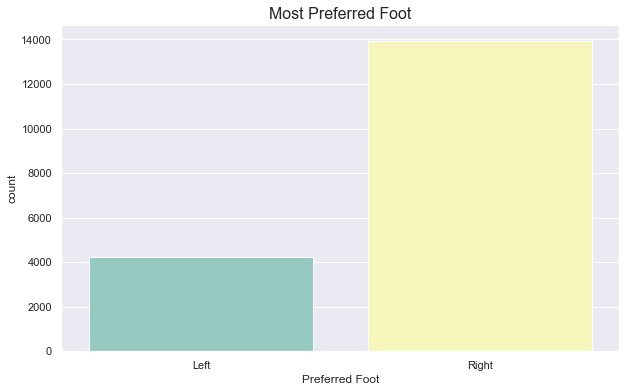

In [17]:
plt.figure(figsize=(10,6))
sns.set(style="darkgrid")
sns.countplot(x="Preferred Foot",data=df_foot,palette="Set3")
plt.title('Most Preferred Foot', fontsize = 16)
plt.show()

# Distribution of weak foot among players

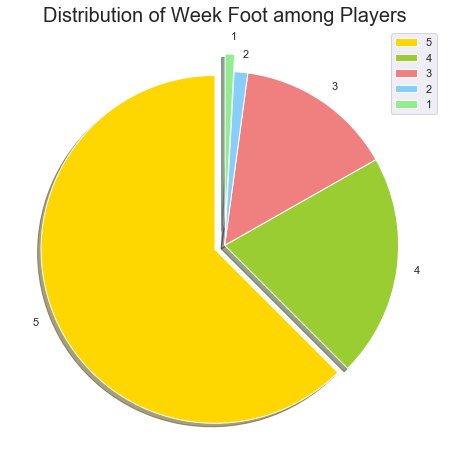

In [18]:
plt.figure(figsize=(14,8))
labels = ['5', '4', '3', '2', '1'] 
val = df['Weak Foot'].value_counts()
colors_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen']
explode_list = [0.06, 0, 0, 0, 0.1]

plt.pie(val, labels = labels, colors = colors_list, explode = explode_list, shadow = True,pctdistance=1.12,startangle = 90)
plt.title('Distribution of Week Foot among Players', fontsize = 20)
plt.legend()
plt.show()

In [19]:
df['Weak Foot'].describe()

count    18159.000000
mean         2.947299
std          0.660456
min          1.000000
25%          3.000000
50%          3.000000
75%          3.000000
max          5.000000
Name: Weak Foot, dtype: float64

# Distribution of skill moves among players

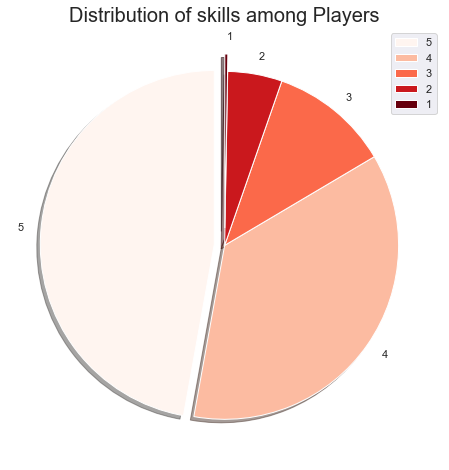

In [20]:
plt.figure(figsize=(14,8))
labels = ['5', '4', '3', '2', '1'] 
val = df['Skill Moves'].value_counts()
colors_list = plt.cm.Reds(np.linspace(0, 1, 5))
explode_list = [0.06, 0, 0, 0, 0.1]

plt.pie(val, labels = labels, colors = colors_list, explode = explode_list, shadow = True,pctdistance=1.12,startangle = 90)
plt.title('Distribution of skills among Players', fontsize = 20)
plt.legend()
plt.show()

In [21]:
df['Skill Moves'].describe()

count    18159.000000
mean         2.361308
std          0.756164
min          1.000000
25%          2.000000
50%          2.000000
75%          3.000000
max          5.000000
Name: Skill Moves, dtype: float64

# Distribution of international reputation among players

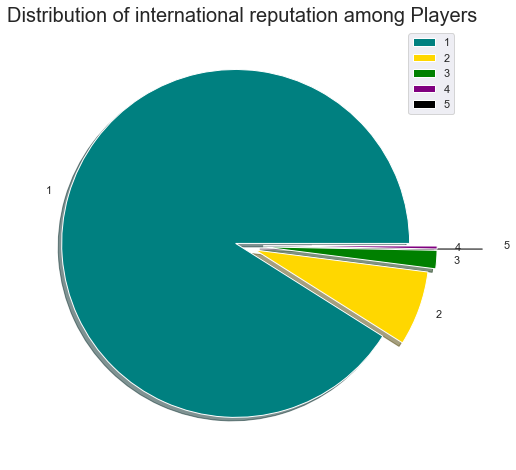

In [22]:
plt.figure(figsize=(14,8))
labels = ['1', '2', '3', '4', '5'] 
val = df['International Reputation'].value_counts()
colors_list = ['teal','gold','green','purple','black']
explode_list = [0.04, 0.08, 0.12, 0.12, 0.4]

plt.pie(val, labels = labels, colors = colors_list, explode = explode_list,shadow=True, startangle = 360)
plt.title('Distribution of international reputation among Players', fontsize = 20)
plt.legend()
plt.show()

In [23]:
df['International Reputation'].describe()

count    18159.000000
mean         1.113222
std          0.394031
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          5.000000
Name: International Reputation, dtype: float64

# Work rate distribution of players

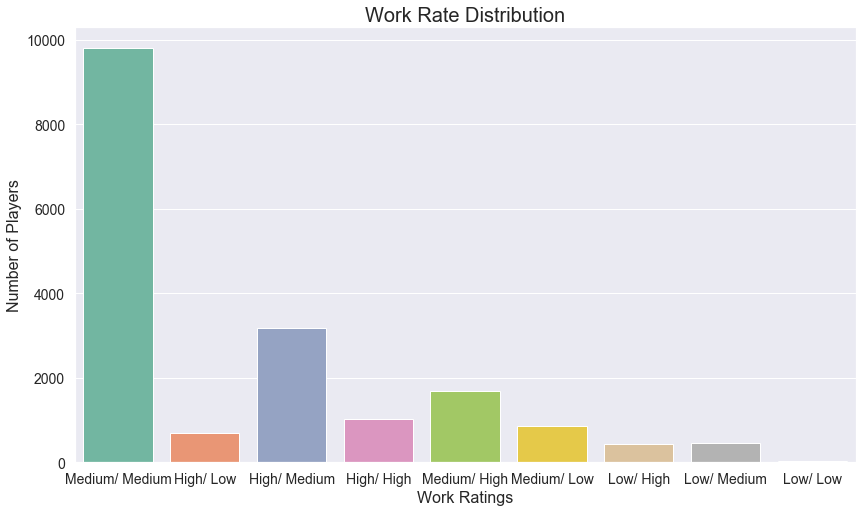

In [24]:
plt.figure(figsize=(14,8))
df_work= df[['Work Rate']]
sns.set(style="darkgrid")
sns.countplot(x="Work Rate",data=df,palette="Set2")
plt.title('Work Rate Distribution', fontsize = 20)
plt.xlabel(xlabel = 'Work Ratings', fontsize = 16)
plt.ylabel(ylabel = 'Number of Players', fontsize = 16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

## Skill move distribution of players

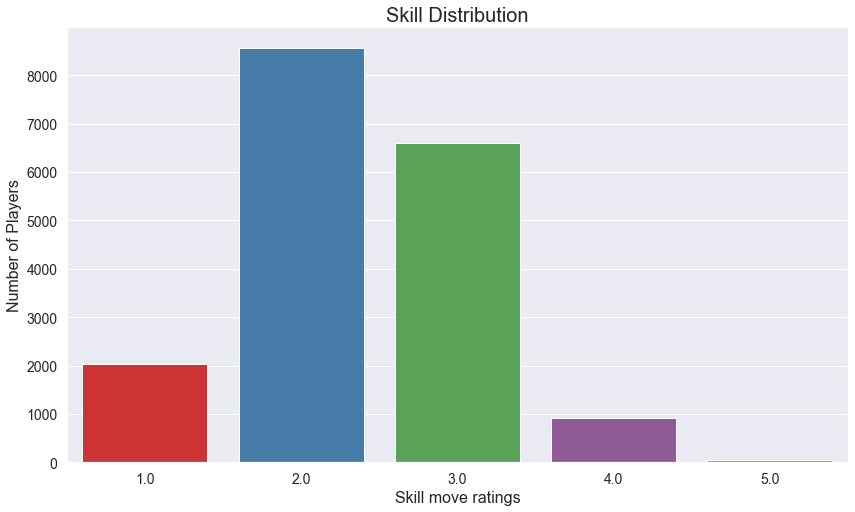

In [25]:
plt.figure(figsize=(14,8))
sns.set(style="darkgrid")
sns.countplot(x="Skill Moves",data=df,palette="Set1")
plt.title('Skill Distribution', fontsize = 20)
plt.xlabel(xlabel = 'Skill move ratings', fontsize = 16)
plt.ylabel(ylabel = 'Number of Players', fontsize = 16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

# Overall distribution of players

In [26]:
df['Overall'].describe()

count    18207.000000
mean        66.238699
std          6.908930
min         46.000000
25%         62.000000
50%         66.000000
75%         71.000000
max         94.000000
Name: Overall, dtype: float64

(array([ 40.,  50.,  60.,  70.,  80.,  90., 100.]),
 <a list of 7 Text xticklabel objects>)

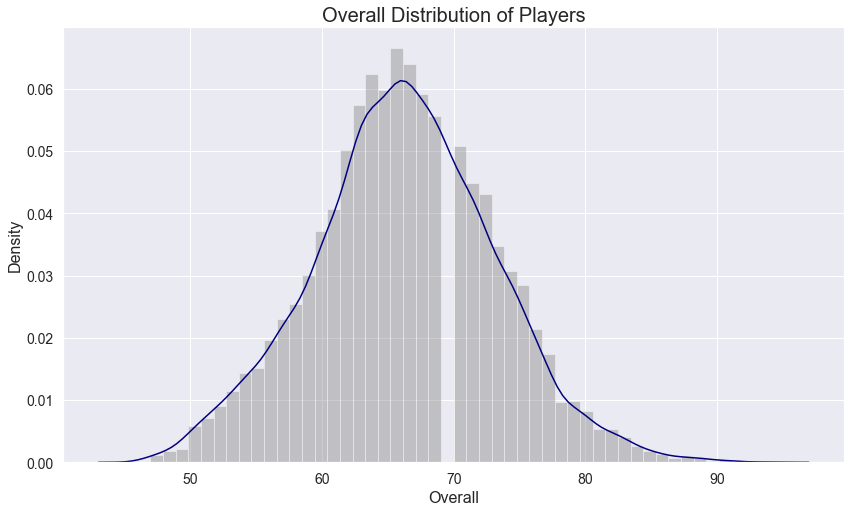

In [27]:
plt.figure(figsize=(14,8))
sns.distplot(df['Overall'],hist_kws={'color':'gray'},kde_kws={'color':'Navy'})
plt.title('Overall Distribution of Players', fontsize = 20)
plt.xlabel('Overall', fontsize = 16)
plt.ylabel('Density', fontsize = 16)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)

# Potential distribution of players

In [28]:
df['Potential'].describe()

count    18207.000000
mean        71.307299
std          6.136496
min         48.000000
25%         67.000000
50%         71.000000
75%         75.000000
max         95.000000
Name: Potential, dtype: float64

(array([ 40.,  50.,  60.,  70.,  80.,  90., 100., 110.]),
 <a list of 8 Text xticklabel objects>)

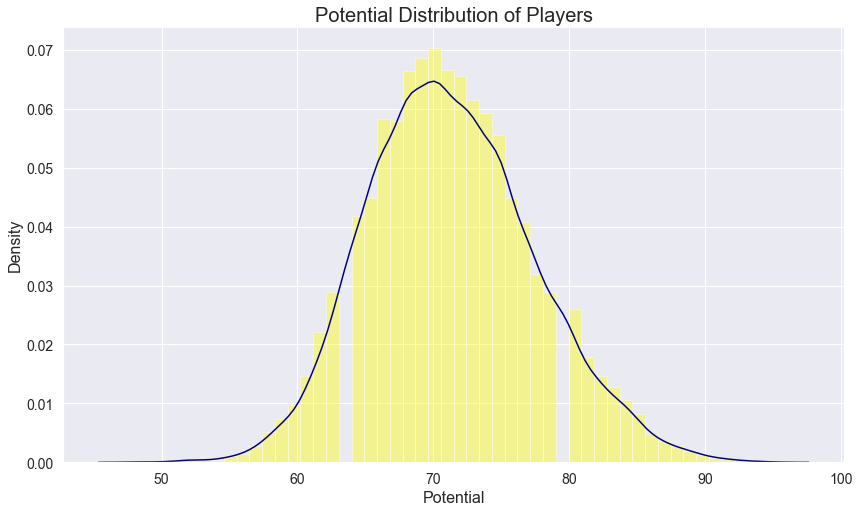

In [29]:
plt.figure(figsize=(14,8))
sns.distplot(df['Potential'],hist_kws={'color':'yellow'},kde_kws={'color':'Navy'})
plt.title('Potential Distribution of Players', fontsize = 20)
plt.xlabel('Potential', fontsize = 16)
plt.ylabel('Density', fontsize = 16)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)

# Special Score distribution among players

(array([ 500.,  750., 1000., 1250., 1500., 1750., 2000., 2250., 2500.,
        2750.]), <a list of 10 Text xticklabel objects>)

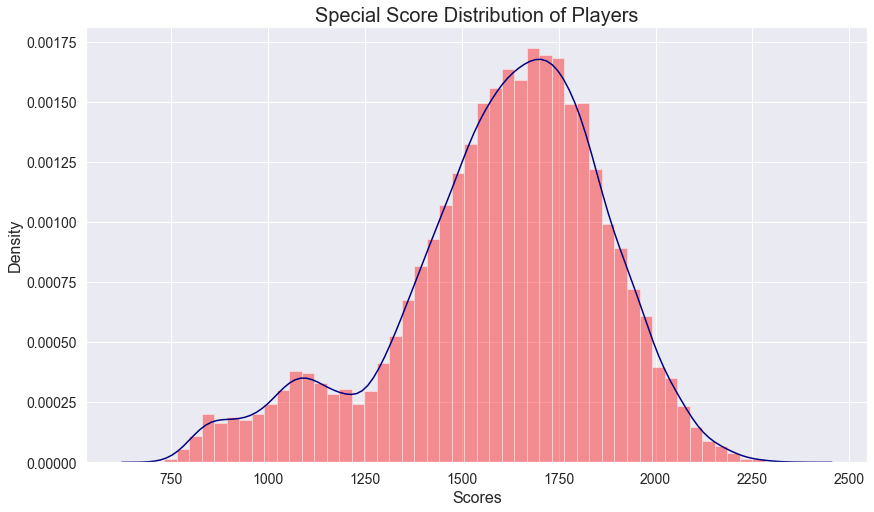

In [30]:
plt.figure(figsize=(14,8))
sns.distplot(df['Special'],hist_kws={'color':'red'},kde_kws={'color':'Navy'})
plt.title('Special Score Distribution of Players', fontsize = 20)
plt.xlabel('Scores', fontsize = 16)
plt.ylabel('Density', fontsize = 16)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)

# Weight distribution among players

In [31]:
df['Weight'] = df['Weight'].apply(lambda x : float(str(x).replace('lbs','')))
x = np.mean(df['Weight'])
df['Weight'].fillna(x, inplace = True)

In [32]:
df['Weight'].describe()

count    18207.000000
mean       165.979129
std         15.572775
min        110.000000
25%        154.000000
50%        165.000000
75%        176.000000
max        243.000000
Name: Weight, dtype: float64

(array([ 80., 100., 120., 140., 160., 180., 200., 220., 240., 260.]),
 <a list of 10 Text xticklabel objects>)

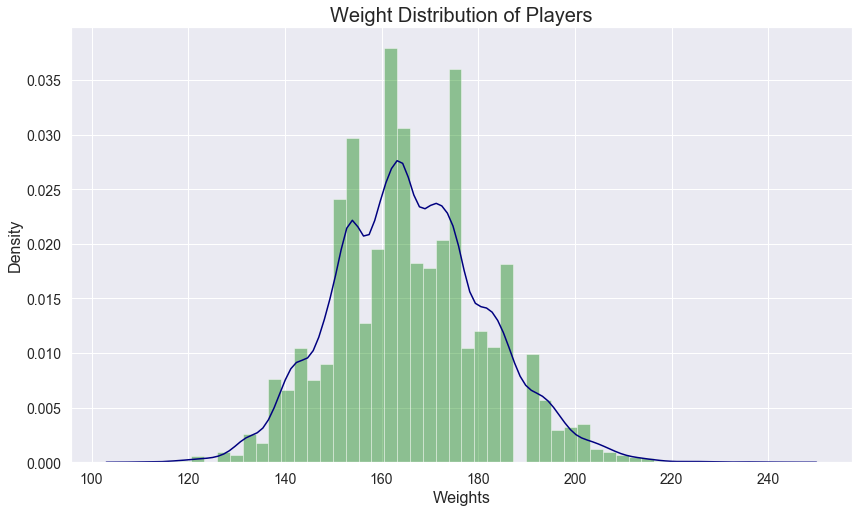

In [33]:
plt.figure(figsize=(14,8))
sns.distplot(df['Weight'],hist_kws={'color':'Green'},kde_kws={'color':'Navy'})
plt.title('Weight Distribution of Players', fontsize = 20)
plt.xlabel('Weights', fontsize = 16)
plt.ylabel('Density', fontsize = 16)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)

# Height Distribution of Players

In [34]:
import warnings
warnings.filterwarnings('ignore')
df_new = pd.read_csv('C:\\Users\\Shubham raj\\Desktop\Datasets\Fifa 19 dataset/data.csv')
df_new.drop(['Unnamed: 0'],axis=1,inplace=True)
df_new['Height'] = df_new['Height'].apply(lambda x : float(str(x).replace("'",'.')))
#Converting into inches
df_new['Height'] = df_new['Height'].apply(lambda x: np.floor(x)*12 + (x-np.floor(x))*10)
for i,val in enumerate(df_new['Height']):
    if val == 61.0:
        df_new['Height'][i] += 9
    elif val == 61.1:
        df_new['Height'][i] += 9.9
x = np.mean(df_new['Height'])
df_new['Height'].fillna(x, inplace = True)
df_new['Height']

0        67.0
1        74.0
2        69.0
3        76.0
4        71.0
         ... 
18202    69.0
18203    75.0
18204    68.0
18205    70.0
18206    70.0
Name: Height, Length: 18207, dtype: float64

In [35]:
df_new['Height'].describe()

count    18207.000000
mean        71.362740
std          2.642881
min         62.000000
25%         69.000000
50%         71.000000
75%         73.000000
max         81.000000
Name: Height, dtype: float64

(array([55., 60., 65., 70., 75., 80., 85.]),
 <a list of 7 Text xticklabel objects>)

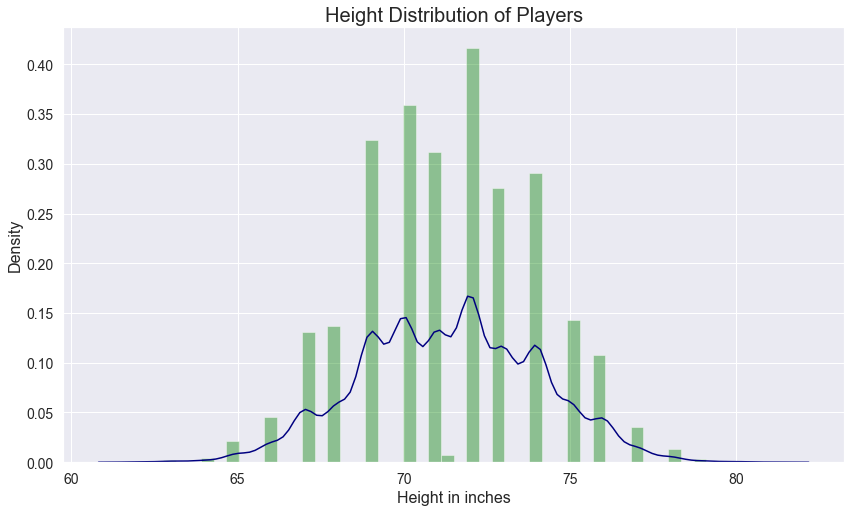

In [36]:
plt.figure(figsize=(14,8))
sns.distplot(df_new['Height'],hist_kws={'color':'Green'},kde_kws={'color':'Navy'})
plt.title('Height Distribution of Players', fontsize = 20)
plt.xlabel('Height in inches', fontsize = 16)
plt.ylabel('Density', fontsize = 16)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)

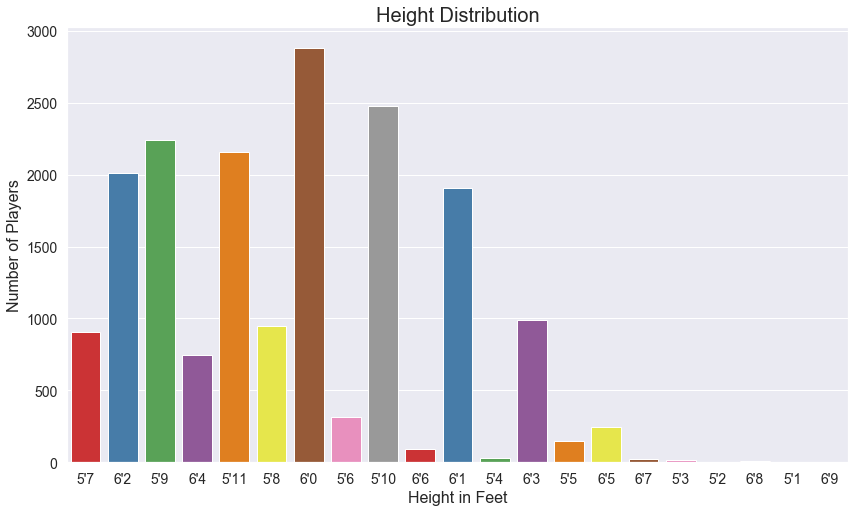

In [37]:
plt.figure(figsize = (14, 8))
sns.countplot(x = 'Height', data = df, palette="Set1")
plt.title(label = 'Height Distribution', fontsize = 20)
plt.xlabel(xlabel = 'Height in Feet', fontsize = 16)
plt.ylabel(ylabel = 'Number of Players', fontsize = 16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

# Age distribution of players

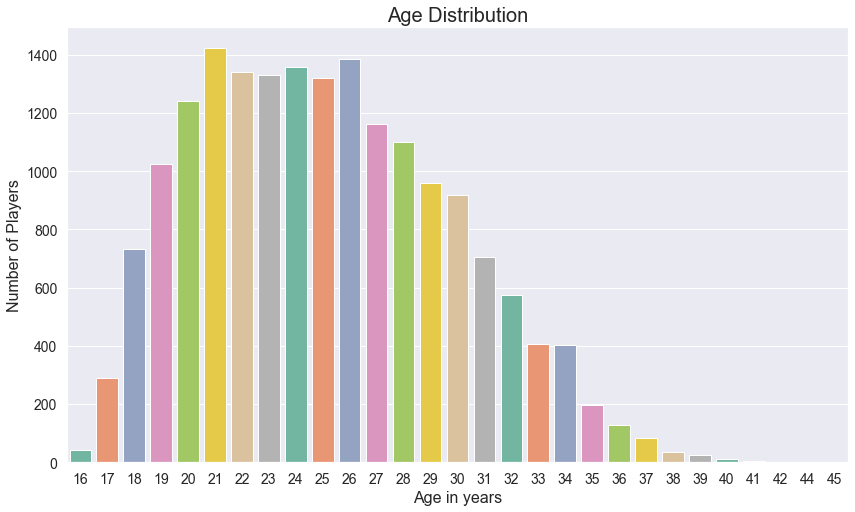

In [38]:
plt.figure(figsize = (14, 8))
sns.countplot(x = 'Age', data = df, palette="Set2")
plt.title(label = 'Age Distribution', fontsize = 20)
plt.xlabel(xlabel = 'Age in years', fontsize = 16)
plt.ylabel(ylabel = 'Number of Players', fontsize = 16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [39]:
df['Age'].describe()

count    18207.000000
mean        25.122206
std          4.669943
min         16.000000
25%         21.000000
50%         25.000000
75%         28.000000
max         45.000000
Name: Age, dtype: float64

# Weekly wage distribution of players

In [72]:
df_w = df['Wage']
df_w = df_w.apply(lambda x : str(x).replace('€',''))
df_w = df_w.apply(lambda x : float(str(x).replace('K','')))
x = np.mean(df_w)
df_w.fillna(x, inplace = True)

In [73]:
df_w.describe()

count    18207.000000
mean         9.731312
std         21.999290
min          0.000000
25%          1.000000
50%          3.000000
75%          9.000000
max        565.000000
Name: Wage, dtype: float64

(array([-100.,    0.,  100.,  200.,  300.,  400.,  500.,  600.]),
 <a list of 8 Text xticklabel objects>)

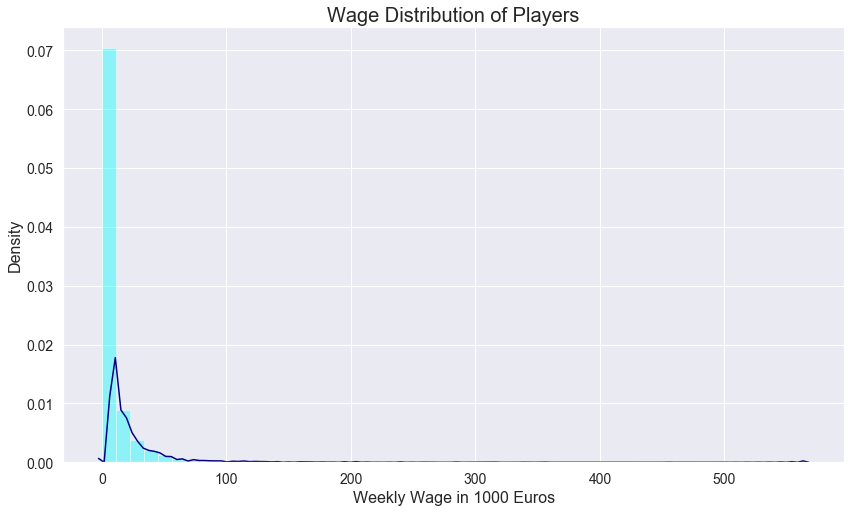

In [74]:
plt.figure(figsize=(14,8))
sns.distplot(df_w,hist_kws={'color':'cyan'},kde_kws={'color':'Navy'})
plt.title('Wage Distribution of Players', fontsize = 20)
plt.xlabel('Weekly Wage in 1000 Euros', fontsize = 16)
plt.ylabel('Density', fontsize = 16)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)

# Value distribution of players

In [43]:
def cleaned_data(Val):
    out = Val.replace('€', '')
    if 'M' in out:
        out = float(out.replace('M', ''))*1000000
    elif 'K' in Val:
        out = float(out.replace('K', ''))*1000
    return float(out)

In [75]:
df_v = df['Value']
df_v = df_v.apply(lambda x: cleaned_data(x))
x = np.mean(df_v)
df_v.fillna(x, inplace = True)

In [76]:
df_v.describe()

count    1.820700e+04
mean     2.410696e+06
std      5.594933e+06
min      0.000000e+00
25%      3.000000e+05
50%      6.750000e+05
75%      2.000000e+06
max      1.185000e+08
Name: Value, dtype: float64

(array([-2.0e+07,  0.0e+00,  2.0e+07,  4.0e+07,  6.0e+07,  8.0e+07,
         1.0e+08,  1.2e+08,  1.4e+08]), <a list of 9 Text xticklabel objects>)

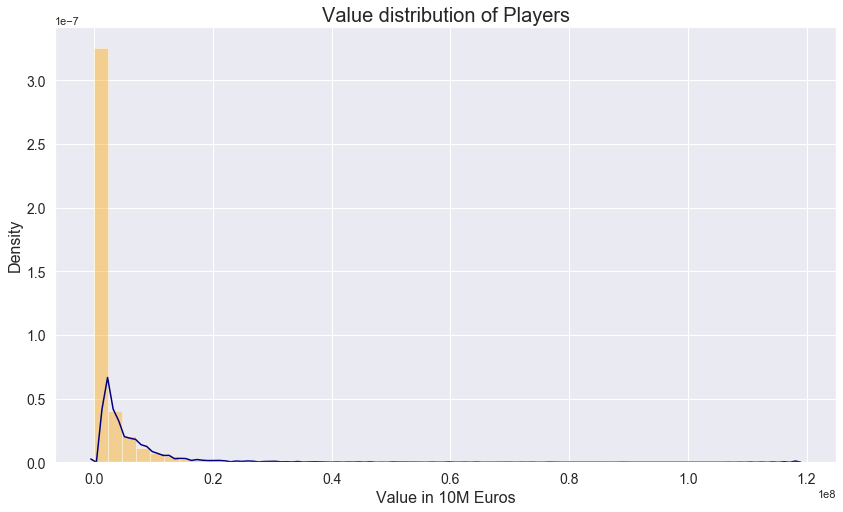

In [77]:
plt.figure(figsize=(14,8))
sns.distplot(df_v,hist_kws={'color':'orange'},kde_kws={'color':'Navy'})
plt.title('Value distribution of Players', fontsize = 20)
plt.xlabel('Value in 10M Euros', fontsize = 16)
plt.ylabel('Density', fontsize = 16)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)

# Correlation between Overall Rating and International Reputation

In [47]:
comp1_df = df[['Overall','International Reputation']]
comp1_df.dropna(inplace=True)

In [48]:
pearson_coef, p_value = stats.pearsonr(comp1_df['Overall'],comp1_df['International Reputation'])
print((pearson_coef,p_value))

(0.4994911571283012, 0.0)


(array([ 40.,  50.,  60.,  70.,  80.,  90., 100.]),
 <a list of 7 Text xticklabel objects>)

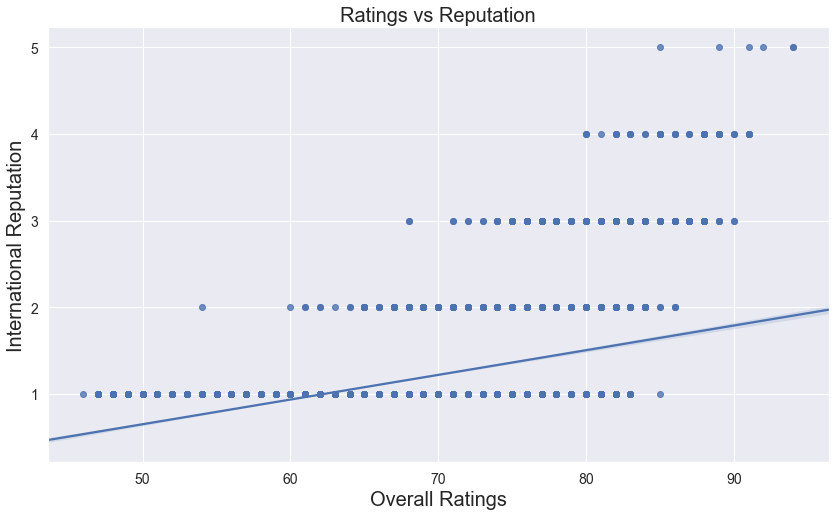

In [49]:
plt.figure(figsize=(14,8))
sns.regplot(x='Overall',y='International Reputation',data=comp1_df)
plt.xlabel('Overall Ratings', fontsize = 20)
plt.ylabel('International Reputation', fontsize = 20)
plt.title('Ratings vs Reputation', fontweight = 20, fontsize = 20)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)

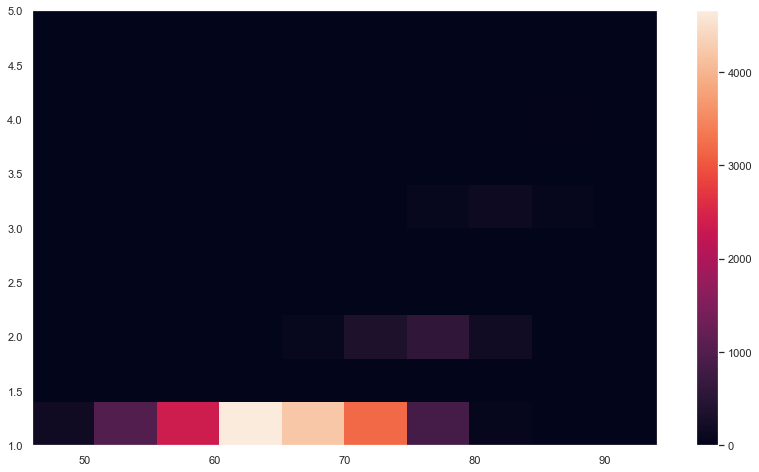

In [50]:
plt.figure(figsize=(14,8))
plt.hist2d(comp1_df['Overall'],comp1_df['International Reputation'])
plt.colorbar()

# Correlation between Overall rating and Wage

In [51]:
comp2_df = df[['Overall','Wage']]
comp2_df['Wage'] = comp2_df['Wage'].apply(lambda x : str(x).replace('€',''))
comp2_df['Wage'] = comp2_df['Wage'].apply(lambda x : float(str(x).replace('K','')))
x = np.mean(comp2_df['Wage'])
comp2_df['Wage'].fillna(x, inplace = True)

In [52]:
pearson_coef, p_value = stats.pearsonr(comp2_df['Overall'],comp2_df['Wage'])
print((pearson_coef,p_value))

(0.5719260112876149, 0.0)


(array([ 40.,  50.,  60.,  70.,  80.,  90., 100.]),
 <a list of 7 Text xticklabel objects>)

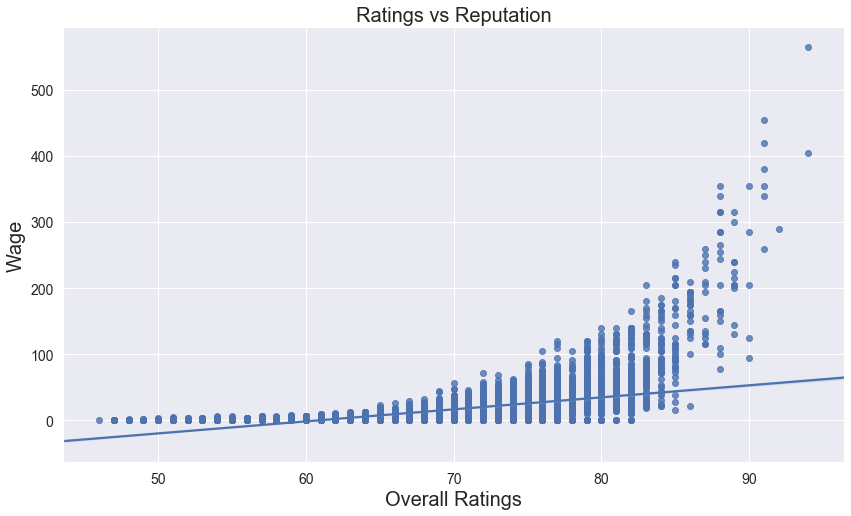

In [53]:
plt.figure(figsize=(14,8))
sns.regplot(x='Overall',y='Wage',data=comp2_df)
plt.xlabel('Overall Ratings', fontsize = 20)
plt.ylabel('Wage', fontsize = 20)
plt.title('Ratings vs Reputation', fontweight = 20, fontsize = 20)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)

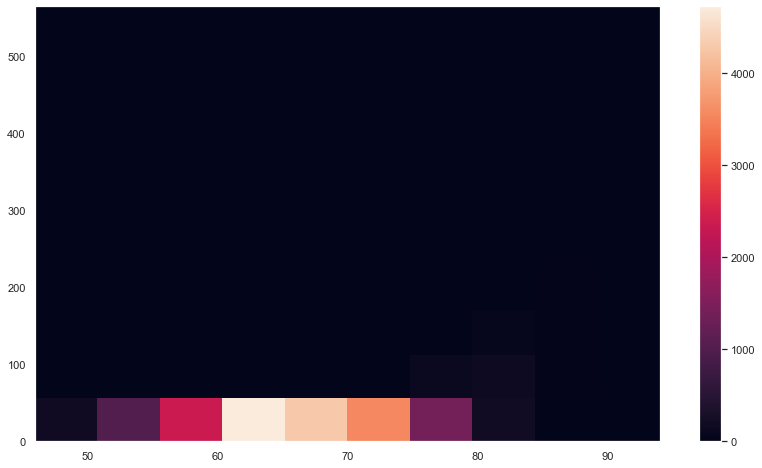

In [54]:
plt.figure(figsize=(14,8))
plt.hist2d(comp2_df['Overall'],comp2_df['Wage'])
plt.colorbar()

# Correlation between weight and height

In [55]:
import warnings
warnings.filterwarnings('ignore')
comp3_new = pd.read_csv('C:\\Users\\Shubham raj\\Desktop\Datasets\Fifa 19 dataset/data.csv')
comp3_new.drop(['Unnamed: 0'],axis=1,inplace=True)
comp3_df = comp3_new[['Weight','Height']]
comp3_df['Height'] = comp3_df['Height'].apply(lambda x : float(str(x).replace("'",'.')))
#Converting into inches
comp3_df['Height'] = comp3_df['Height'].apply(lambda x: np.floor(x)*12 + (x-np.floor(x))*10)
for i,val in enumerate(comp3_df['Height']):
    if val == 61.0:
        comp3_df['Height'][i] += 9
    elif val == 61.1:
        comp3_df['Height'][i] += 9.9
x = np.mean(comp3_df['Height'])
comp3_df['Height'].fillna(x, inplace = True)

comp3_df['Weight'] = comp3_df['Weight'].apply(lambda x : float(str(x).replace('lbs','')))
x = np.mean(comp3_df['Weight'])
comp3_df['Weight'].fillna(x, inplace = True)

In [56]:
pearson_coef, p_value = stats.pearsonr(comp3_df['Weight'],comp3_df['Height'])
print((pearson_coef,p_value))

(0.7540081850368681, 0.0)


(array([100., 120., 140., 160., 180., 200., 220., 240., 260.]),
 <a list of 9 Text xticklabel objects>)

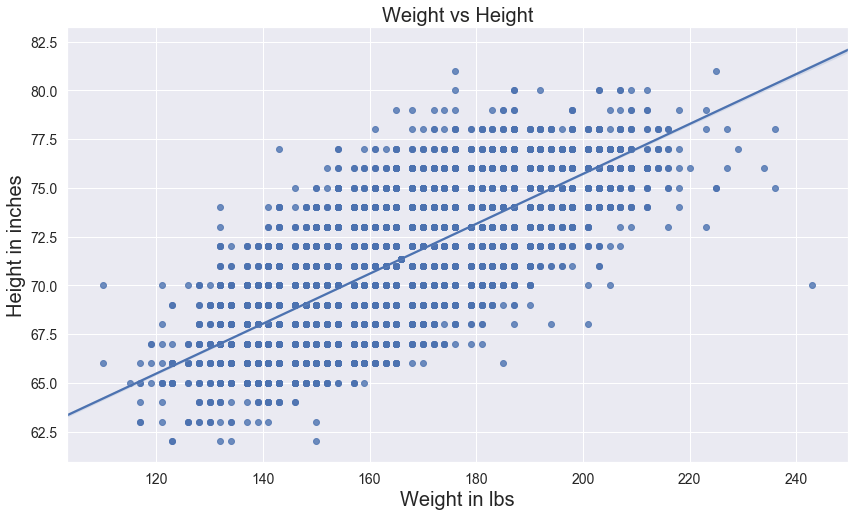

In [57]:
plt.figure(figsize=(14,8))
sns.regplot(x='Weight',y='Height',data=comp3_df)
plt.xlabel('Weight in lbs', fontsize = 20)
plt.ylabel('Height in inches', fontsize = 20)
plt.title('Weight vs Height', fontweight = 20, fontsize = 20)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)

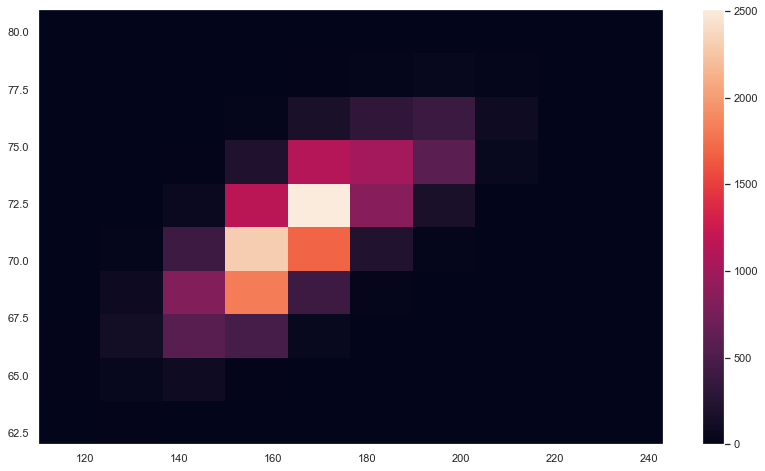

In [58]:
plt.figure(figsize=(14,8))
plt.hist2d(comp3_df['Weight'],comp3_df['Height'])
plt.colorbar()

# Correlation between Age and Overall Rating

In [59]:
comp4_df = df[['Overall','Age']]
comp4_df.dropna(inplace=True)

In [60]:
pearson_coef, p_value = stats.pearsonr(comp4_df['Age'],comp4_df['Overall'])
print((pearson_coef,p_value))

(0.45234952145633545, 0.0)


(array([10., 15., 20., 25., 30., 35., 40., 45., 50.]),
 <a list of 9 Text xticklabel objects>)

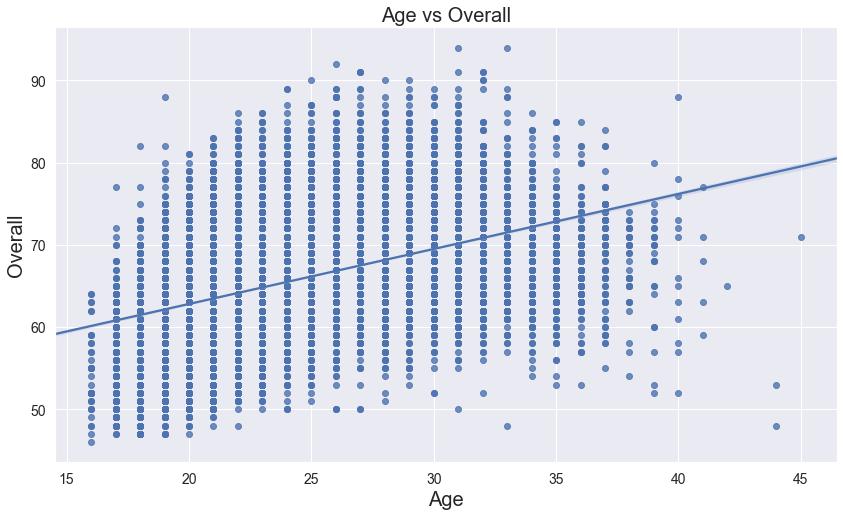

In [61]:
plt.figure(figsize=(14,8))
sns.regplot(x='Age',y='Overall',data=comp4_df)
plt.xlabel('Age', fontsize = 20)
plt.ylabel('Overall', fontsize = 20)
plt.title('Age vs Overall', fontweight = 20, fontsize = 20)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)

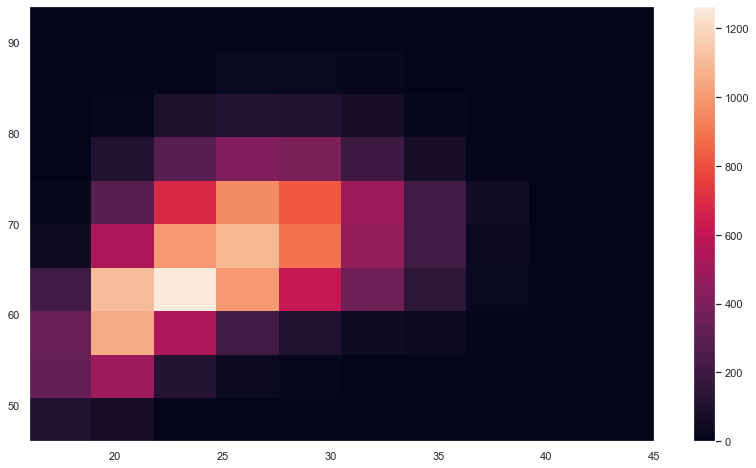

In [62]:
plt.figure(figsize=(14,8))
plt.hist2d(comp4_df['Age'],comp2_df['Overall'])
plt.colorbar()

# Correlation between Age and Wage

In [63]:
comp5_df = df[['Age','Wage']]
comp5_df['Wage'] = comp5_df['Wage'].apply(lambda x : str(x).replace('€',''))
comp5_df['Wage'] = comp5_df['Wage'].apply(lambda x : float(str(x).replace('K','')))
x = np.mean(comp5_df['Wage'])
comp5_df['Wage'].fillna(x, inplace = True)

In [64]:
pearson_coef, p_value = stats.pearsonr(comp5_df['Age'],comp5_df['Wage'])
print((pearson_coef,p_value))

(0.1411450310839739, 1.178452738285234e-81)


(array([10., 15., 20., 25., 30., 35., 40., 45., 50.]),
 <a list of 9 Text xticklabel objects>)

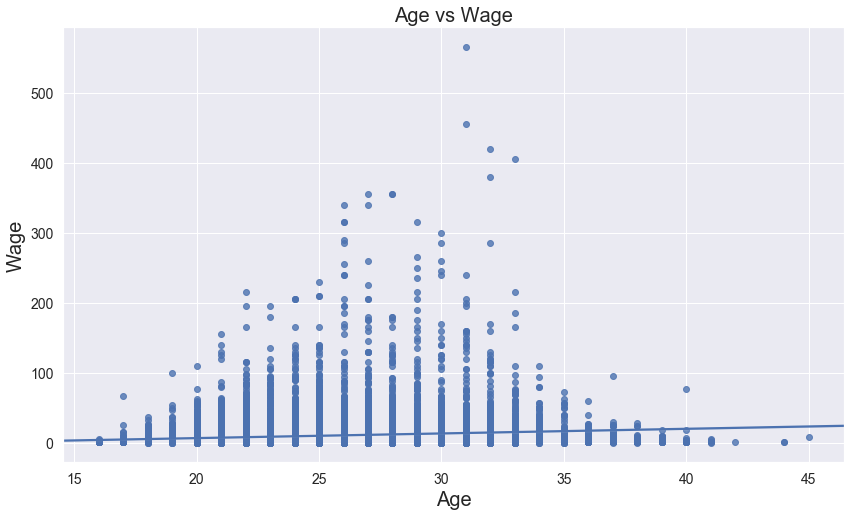

In [189]:
plt.figure(figsize=(14,8))
sns.regplot(x='Age',y='Wage',data=comp5_df)
plt.xlabel('Age', fontsize = 20)
plt.ylabel('Wage', fontsize = 20)
plt.title('Age vs Wage', fontweight = 20, fontsize = 20)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)

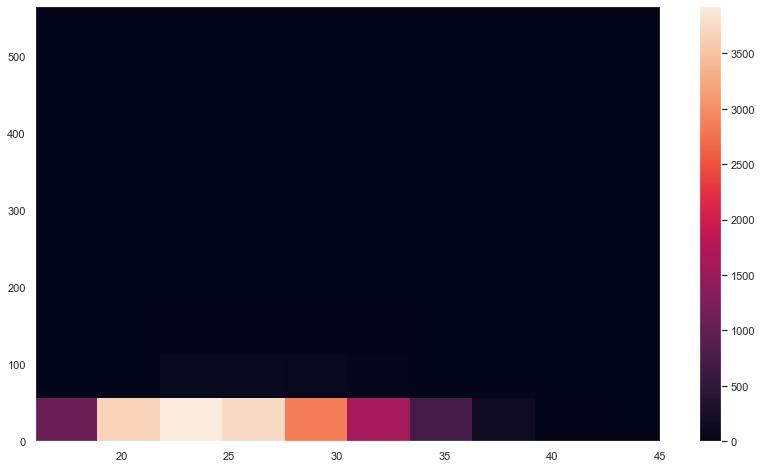

In [66]:
plt.figure(figsize=(14,8))
plt.hist2d(comp5_df['Age'],comp5_df['Wage'])
plt.colorbar()

## Correlation between ballcontrol and dribbling for both left footed and right footed players

### (i) Left Footed

In [121]:
df_lf = df[df['Preferred Foot'] == "Left"][['BallControl','Dribbling']]

In [122]:
pearson_coef, p_value = stats.pearsonr(df_lf['BallControl'],df_lf['Dribbling'])
print((pearson_coef,p_value))

(0.9097221911913033, 0.0)


### (ii) Right Footed

In [123]:
df_rf = df[df['Preferred Foot'] == "Right"][['BallControl','Dribbling']]

In [124]:
pearson_coef, p_value = stats.pearsonr(df_rf['BallControl'],df_rf['Dribbling'])
print((pearson_coef,p_value))

(0.9432998728593667, 0.0)


## Comparison:

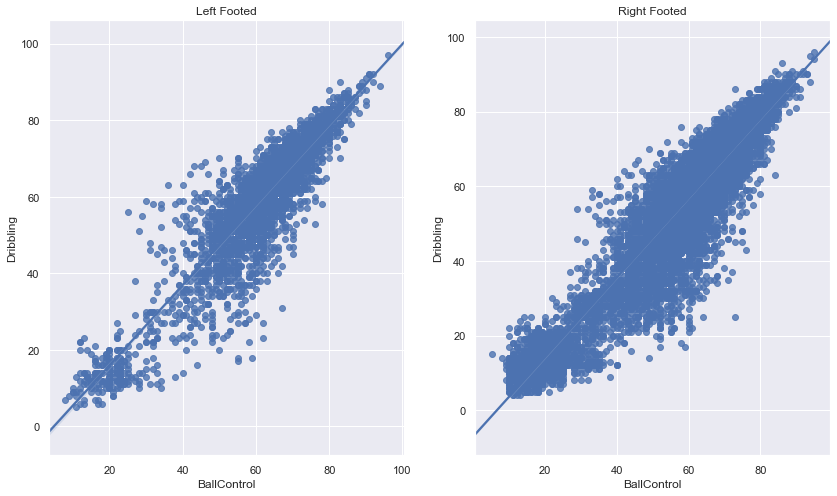

In [190]:
%matplotlib inline
plt.figure(figsize=(14,8))
plt.subplot(121)
sns.regplot(x='BallControl',y='Dribbling',data=df_lf)
plt.title('Left Footed')
plt.subplot(122)
sns.regplot(x='BallControl',y='Dribbling',data=df_rf)
plt.title('Right Footed')
plt.show()

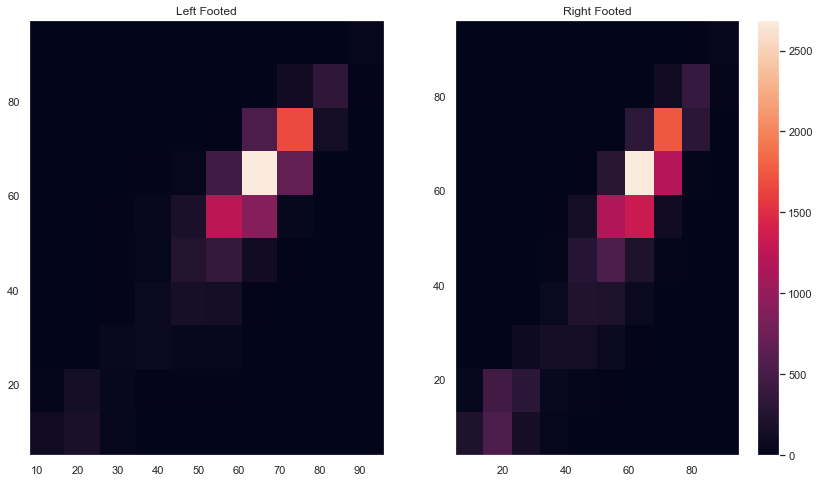

In [191]:
plt.figure(figsize=(14,8))
plt.subplot(121)
plt.hist2d(df_lf['BallControl'],df_lf['Dribbling'])
plt.title('Left Footed')
plt.subplot(122)
plt.hist2d(df_rf['BallControl'],df_rf['Dribbling'])
plt.title('Right Footed')
plt.colorbar()
plt.show()

## Correlation between balance and dribbling for both left footed and right footed players

### (i) Left Footed

In [146]:
df_lf2 = df[df['Preferred Foot'] == "Left"][['Balance','Dribbling']]

In [147]:
pearson_coef, p_value = stats.pearsonr(df_lf2['Balance'],df_lf2['Dribbling'])
print((pearson_coef,p_value))

(0.5997417053627809, 0.0)


### (ii) Right Footed

In [148]:
df_rf2 = df[df['Preferred Foot'] == "Right"][['Balance','Dribbling']]

In [149]:
pearson_coef, p_value = stats.pearsonr(df_rf2['Balance'],df_rf2['Dribbling'])
print((pearson_coef,p_value))

(0.6737749520956411, 0.0)


### Comaprison:

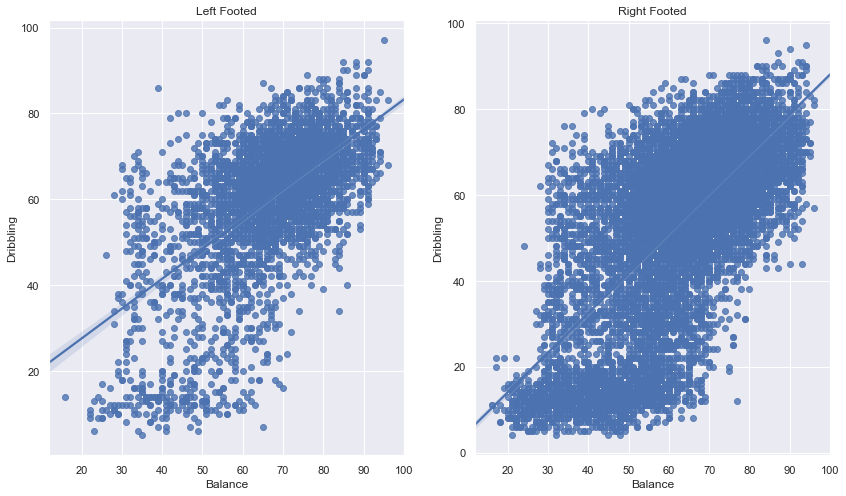

In [210]:
%matplotlib inline
plt.figure(figsize=(14,8))
plt.subplot(121)
sns.regplot(x='Balance',y='Dribbling',data=df_lf2)
plt.title('Left Footed')
plt.subplot(122)
sns.regplot(x='Balance',y='Dribbling',data=df_rf2)
plt.title('Right Footed')
plt.show()

In [214]:
# This plot has interactivity, click at any position on the graph to see the values of balance and dribbling at the point
#%matplotlib notebook
#plt.figure(figsize=(8,6))
#sns.regplot(x='Balance',y='Dribbling',data=df_lf2)
#def onclick(event):
#    plt.cla()
#    sns.regplot(x='Balance',y='Dribbling',data=df_lf2)
#    plt.gca().set_title('Balance {} \nand Dribbling {} for left footed'.format(event.xdata, event.ydata),fontsize=16)
#plt.gcf().canvas.mpl_connect('button_release_event', onclick)


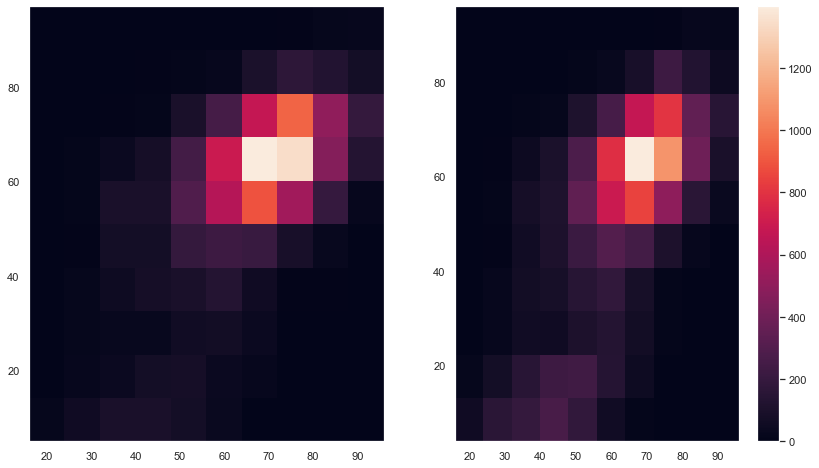

In [152]:
plt.figure(figsize=(14,8))
plt.subplot(121)
plt.hist2d(df_lf2['Balance'],df_lf2['Dribbling'])
plt.subplot(122)
plt.hist2d(df_rf2['Balance'],df_rf2['Dribbling'])
plt.colorbar()
plt.show()

## Best player of each position based on their overall scores

In [78]:
df.iloc[df.groupby(df['Position'])['Overall'].idxmax()][['Name','Age','Position','Potential','Nationality','Club','Value','Preferred Foot']]

,Name,Age,Position,Potential,Nationality,Club,Value,Preferred Foot
17,A. Griezmann,27,CAM,90,France,Atlético Madrid,€78M,Left
12,D. Godín,32,CB,90,Uruguay,Atlético Madrid,€44M,Right
20,Sergio Busquets,29,CDM,89,Spain,FC Barcelona,€51.5M,Right
271,Luis Alberto,25,CF,85,Spain,Lazio,€28.5M,Right
67,Thiago,27,CM,86,Spain,FC Bayern München,€45.5M,Right
3,De Gea,27,GK,93,Spain,Manchester United,€72M,Right
28,J. Rodríguez,26,LAM,89,Colombia,FC Bayern München,€69.5M,Left
35,Marcelo,30,LB,88,Brazil,Real Madrid,€43M,Left
24,G. Chiellini,33,LCB,89,Italy,Juventus,€27M,Left
11,T. Kroos,28,LCM,90,Germany,Real Madrid,€76.5M,Right


# Best left footed players 

In [104]:
df_l = df[df['Preferred Foot'] == "Left"][['Name','Age','Nationality','Club','Overall']].head(10)
df_l.style.background_gradient(cmap='Greens')

,Name,Age,Nationality,Club,Overall
0,L. Messi,31,Argentina,FC Barcelona,94
13,David Silva,32,Spain,Manchester City,90
15,P. Dybala,24,Argentina,Juventus,89
17,A. Griezmann,27,France,Atlético Madrid,89
19,T. Courtois,26,Belgium,Real Madrid,89
24,G. Chiellini,33,Italy,Juventus,89
26,M. Salah,26,Egypt,Liverpool,88
28,J. Rodríguez,26,Colombia,FC Bayern München,88
35,Marcelo,30,Brazil,Real Madrid,88
36,G. Bale,28,Wales,Real Madrid,88


# Best right footed players

In [105]:
df_r = df[df['Preferred Foot'] == "Right"][['Name','Age','Nationality','Club','Overall']].head(10)
df_r.style.background_gradient(cmap='Blues')

,Name,Age,Nationality,Club,Overall
1,Cristiano Ronaldo,33,Portugal,Juventus,94
2,Neymar Jr,26,Brazil,Paris Saint-Germain,92
3,De Gea,27,Spain,Manchester United,91
4,K. De Bruyne,27,Belgium,Manchester City,91
5,E. Hazard,27,Belgium,Chelsea,91
6,L. Modrić,32,Croatia,Real Madrid,91
7,L. Suárez,31,Uruguay,FC Barcelona,91
8,Sergio Ramos,32,Spain,Real Madrid,91
9,J. Oblak,25,Slovenia,Atlético Madrid,90
10,R. Lewandowski,29,Poland,FC Bayern München,90


# Best goalkeepers

In [100]:
df_g = df[['Name','Age','Nationality','Club','GKDiving','GKHandling','GKKicking','GKPositioning','GKReflexes']]
df_g['GK'] = (df_g['GKDiving']+df_g['GKHandling']+df_g['GKKicking']+df_g['GKPositioning']+df_g['GKReflexes'])/5
df_g.sort_values(by=['GK'],inplace=True,ascending=False)
df_g2 = df_g.head(10)
df_g2.style.background_gradient(cmap='Purples')

,Name,Age,Nationality,Club,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,GK
3,De Gea,27,Spain,Manchester United,90,85,87,88,94,88.8
22,M. Neuer,32,Germany,FC Bayern München,90,86,91,87,87,88.2
18,M. ter Stegen,26,Germany,FC Barcelona,87,85,88,85,90,87
9,J. Oblak,25,Slovenia,Atlético Madrid,86,92,78,88,89,86.6
57,Ederson,24,Brazil,Manchester City,85,80,91,82,87,85
19,T. Courtois,26,Belgium,Real Madrid,85,91,72,86,88,84.4
41,G. Buffon,40,Italy,Paris Saint-Germain,88,87,74,90,83,84.4
81,Alisson,25,Brazil,Liverpool,83,81,85,84,88,84.2
40,S. Handanovič,33,Slovenia,Inter,87,86,69,89,89,84
46,K. Navas,31,Costa Rica,Real Madrid,90,81,75,82,90,83.6


# Messi vs Ronaldo

In [234]:
df_mero = df.iloc[0:2,:]
df_mero.drop(columns=['Index','ID','Flag','Photo','Club Logo','Real Face','Body Type','Jersey Number','Joined','Contract Valid Until','GKPositioning',
                     'Marking','StandingTackle','SlidingTackle','GKDiving','GKHandling','GKKicking','GKReflexes','Loaned From'],inplace=True)
df_mero['Weight'] = df_mero['Weight'].apply(lambda x : float(str(x).replace('lbs','')))
df_mero['Height'] = df_mero['Height'].apply(lambda x : float(str(x).replace("'",'.')))
df_mero['Height'] = df_mero['Height'].apply(lambda x: np.floor(x)*12 + (x-np.floor(x))*10)
df_mero.rename(columns={'Height':'Height(inches)','Weight':'Weight(lbs)'},inplace=True)
df_mero['BMI'] = 703*df_mero['Weight(lbs)']/(df_mero['Height(inches)']**2)
pd.set_option('display.max_columns', 71)
df_mero

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Position,Height(inches),Weight(lbs),LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Release Clause,BMI
0,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,€565K,2202,Left,5.0,4.0,4.0,Medium/ Medium,RF,67.0,159.0,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,91+2,84+2,84+2,84+2,91+2,64+2,61+2,61+2,61+2,64+2,59+2,47+2,47+2,47+2,59+2,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,€226.5M,24.900200
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,€405K,2228,Right,5.0,4.0,5.0,High/ Low,ST,74.0,183.0,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,€127.1M,23.493243


Text(0.5, 1.0, 'Composure')

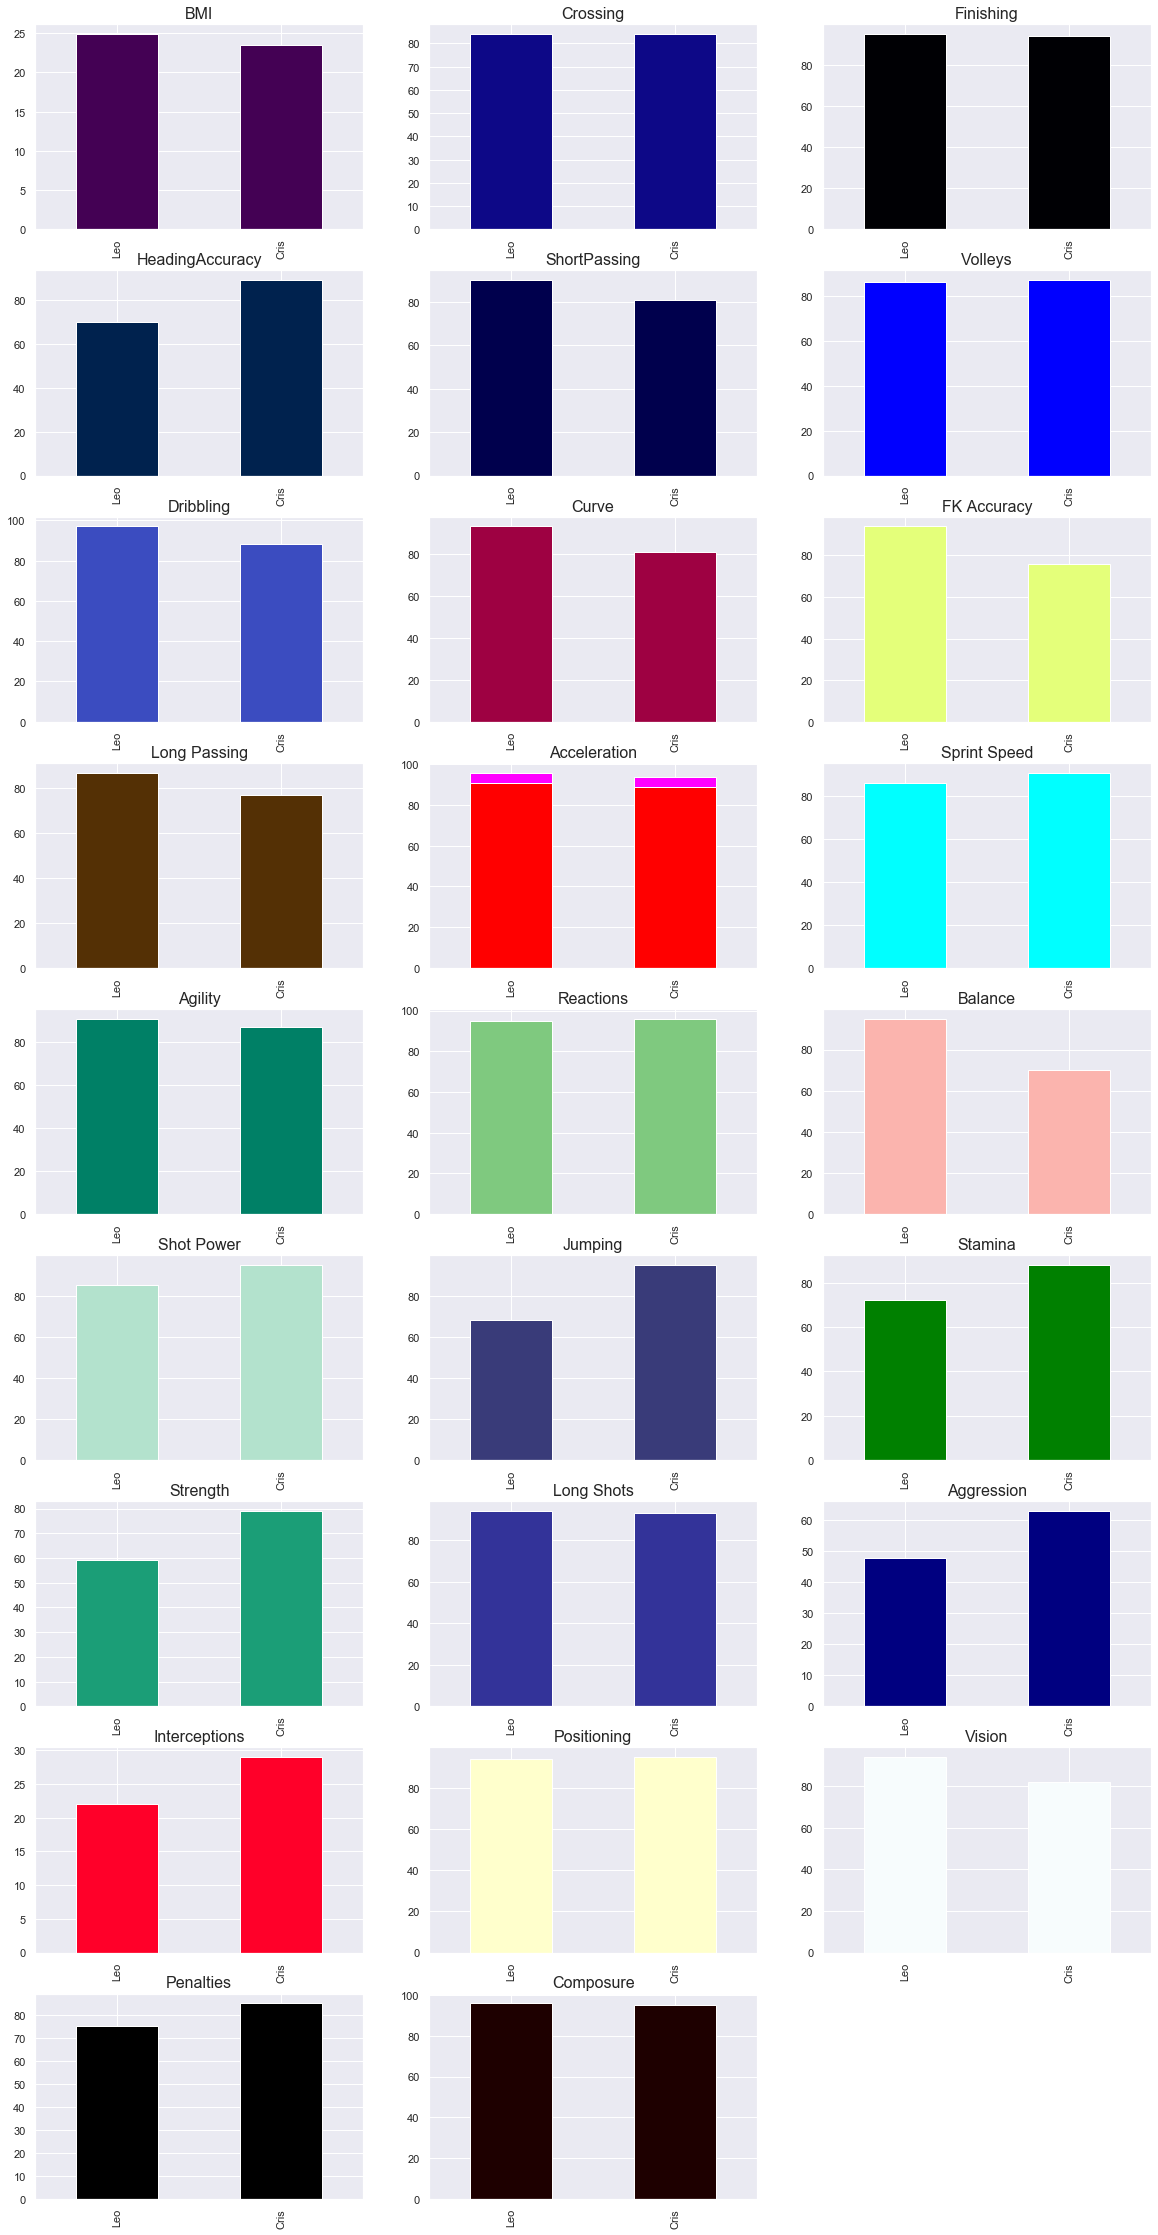

In [306]:
plt.figure(figsize=(20,40))
labels = ['Leo','Cris']
xval = range(2)
plt.subplot(931)
df_mero['BMI'].plot(kind='bar',colormap='viridis')
plt.xticks(xval,labels)
plt.title('BMI',fontsize=16)

plt.subplot(932)
df_mero['Crossing'].plot(kind='bar',colormap='plasma')
plt.xticks(xval,labels)
plt.title('Crossing',fontsize=16)

plt.subplot(933)
df_mero['Finishing'].plot(kind='bar',colormap='inferno')
plt.xticks(xval,labels)
plt.title('Finishing',fontsize=16)

plt.subplot(934)
df_mero['HeadingAccuracy'].plot(kind='bar',colormap='cividis')
plt.xticks(xval,labels)
plt.title('HeadingAccuracy',fontsize=16)

plt.subplot(935)
df_mero['ShortPassing'].plot(kind='bar',colormap='seismic')
plt.xticks(xval,labels)
plt.title('ShortPassing',fontsize=16)

plt.subplot(936)
df_mero['Volleys'].plot(kind='bar',colormap='bwr')
plt.xticks(xval,labels)
plt.title('Volleys',fontsize=16)

plt.subplot(937)
df_mero['Dribbling'].plot(kind='bar',colormap='coolwarm')
plt.xticks(xval,labels)
plt.title('Dribbling',fontsize=16)

plt.subplot(937)
df_mero['Dribbling'].plot(kind='bar',colormap='coolwarm')
plt.xticks(xval,labels)
plt.title('Dribbling',fontsize=16)

plt.subplot(938)
df_mero['Curve'].plot(kind='bar',colormap='Spectral')
plt.xticks(xval,labels)
plt.title('Curve',fontsize=16)

plt.subplot(939)
df_mero['FKAccuracy'].plot(kind='bar',colormap='Wistia')
plt.xticks(xval,labels)
plt.title('FK Accuracy',fontsize=16)

plt.subplot(9,3,10)
df_mero['LongPassing'].plot(kind='bar',colormap='BrBG')
plt.xticks(xval,labels)
plt.title('Long Passing',fontsize=16)

plt.subplot(9,3,11)
df_mero['BallControl'].plot(kind='bar',colormap='spring')
plt.xticks(xval,labels)
plt.title('Ball Control',fontsize=16)

plt.subplot(9,3,11)
df_mero['Acceleration'].plot(kind='bar',colormap='autumn')
plt.xticks(xval,labels)
plt.title('Acceleration',fontsize=16)

plt.subplot(9,3,12)
df_mero['SprintSpeed'].plot(kind='bar',colormap='cool')
plt.xticks(xval,labels)
plt.title('Sprint Speed',fontsize=16)

plt.subplot(9,3,13)
df_mero['Agility'].plot(kind='bar',colormap='summer')
plt.xticks(xval,labels)
plt.title('Agility',fontsize=16)

plt.subplot(9,3,14)
df_mero['Reactions'].plot(kind='bar',colormap='Accent')
plt.xticks(xval,labels)
plt.title('Reactions',fontsize=16)

plt.subplot(9,3,15)
df_mero['Balance'].plot(kind='bar',colormap='Pastel1')
plt.xticks(xval,labels)
plt.title('Balance',fontsize=16)

plt.subplot(9,3,16)
df_mero['ShotPower'].plot(kind='bar',colormap='Pastel2')
plt.xticks(xval,labels)
plt.title('Shot Power',fontsize=16)

plt.subplot(9,3,17)
df_mero['Jumping'].plot(kind='bar',colormap='tab20b')
plt.xticks(xval,labels)
plt.title('Jumping',fontsize=16)

plt.subplot(9,3,18)
df_mero['Stamina'].plot(kind='bar',colormap='ocean')
plt.xticks(xval,labels)
plt.title('Stamina',fontsize=16)

plt.subplot(9,3,19)
df_mero['Strength'].plot(kind='bar',colormap='Dark2')
plt.xticks(xval,labels)
plt.title('Strength',fontsize=16)

plt.subplot(9,3,20)
df_mero['LongShots'].plot(kind='bar',colormap='terrain')
plt.xticks(xval,labels)
plt.title('Long Shots',fontsize=16)

plt.subplot(9,3,21)
df_mero['Aggression'].plot(kind='bar',colormap='gist_ncar')
plt.xticks(xval,labels)
plt.title('Aggression',fontsize=16)

plt.subplot(9,3,22)
df_mero['Interceptions'].plot(kind='bar',colormap='gist_rainbow')
plt.xticks(xval,labels)
plt.title('Interceptions',fontsize=16)

plt.subplot(9,3,23)
df_mero['Positioning'].plot(kind='bar',colormap='YlOrRd')
plt.xticks(xval,labels)
plt.title('Positioning',fontsize=16)

plt.subplot(9,3,24)
df_mero['Vision'].plot(kind='bar',colormap='BuGn')
plt.xticks(xval,labels)
plt.title('Vision',fontsize=16)

plt.subplot(9,3,25)
df_mero['Penalties'].plot(kind='bar',colormap='gray')
plt.xticks(xval,labels)
plt.title('Penalties',fontsize=16)

plt.subplot(9,3,26)
df_mero['Composure'].plot(kind='bar',colormap='pink')
plt.xticks(xval,labels)
plt.title('Composure',fontsize=16)